In [28]:
import tensorflow as tf
from siren import Siren
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange
from Adam import Adam

In [29]:
def get_image(image_path):
    img = np.asarray(Image.open(image_path))
    return img
img = get_image('Testcard_F.jpg')/255
img = img.astype(np.float32)
#moments = tf.nn.moments(img, axes=[0, 1])
#moments
img.shape

(273, 365, 3)

In [30]:
def get_loss(true, guess):
    tf.reduce_mean()

In [31]:
test = img.reshape(-1, 3)
test[1*len(img[0]) + 2]

array([0.99607843, 0.99607843, 0.9882353 ], dtype=float32)

In [32]:
tf.gather_nd(img, [[0,1], [2,3]])

grid_shape = (273, 365)

# Generate meshgrid
x_vals, y_vals = tf.meshgrid(tf.range(273), tf.range(365))
x_vals
# Reshape to create pairs of (x, y) coordinates
coordinates = tf.stack([ tf.reshape(y_vals, -1), tf.reshape(x_vals, -1)], axis=1)
coordinates[90000]


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([329, 183], dtype=int32)>

In [33]:

siren_model = Siren(num_inputs=2, num_outputs=3, num_hidden_layers=5, hidden_layer_width=256)
x_values = tf.random.uniform(shape=[512], maxval=273, dtype=tf.int32)
y_values = tf.random.uniform(shape=[512], maxval=365, dtype=tf.int32)
xy_values = tf.stack([x_values, y_values], axis=1)
image_val = tf.gather_nd(img, xy_values)
out = siren_model(tf.cast(xy_values, dtype=tf.float32))
out = siren_model(tf.cast(coordinates, dtype=tf.float32))
test = tf.reshape(out,shape=[273, 365, -1])
print(out[1*len(img[0]) + 2])
print(test[1][2])

tf.Tensor([0.         0.23576911 0.        ], shape=(3,), dtype=float32)
tf.Tensor([0.         0.23576911 0.        ], shape=(3,), dtype=float32)


Step 999; loss => 0.0012: 100%|██████████| 1000/1000 [00:44<00:00, 22.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

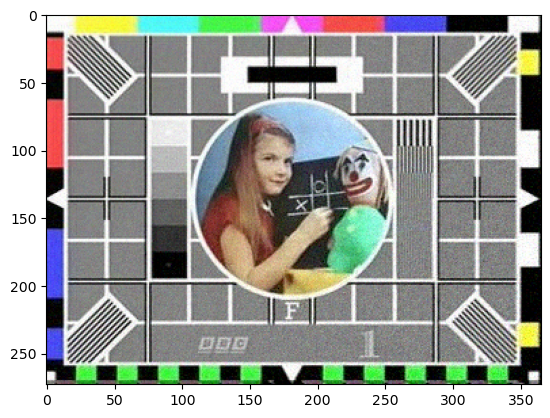

In [34]:
iterations = 1000
bar = trange(iterations)
optimizer = Adam(1e-4)
x_vals, y_vals = tf.meshgrid(tf.range(365), tf.range(273))

# Reshape to create pairs of (x, y) coordinates
cord_vals = tf.stack([ tf.reshape(y_vals, -1), tf.reshape(x_vals, -1)], axis=1)
image_true = tf.gather_nd(img, cord_vals)
frames = []

for i in bar:
    with tf.GradientTape() as tape:
        xy_values = tf.stack([x_values, y_values], axis=1)
        model_output = siren_model(tf.cast(cord_vals, dtype=tf.float32))
        loss = tf.reduce_mean((model_output - image_true)**2)

        grads = tape.gradient(loss, siren_model.trainable_variables)
        optimizer.apply_gradients(grads, siren_model.trainable_variables)
        
        if i % 10 == (10 - 1):
            bar.set_description(f"Step {i}; loss => {loss.numpy():0.4f}")
            bar.refresh()
            
            # Plot and save the image
            plt.imshow(tf.reshape(model_output, shape=[273, 365, -1]))
            plt.axis('off')
            plt.savefig(f"frames/frame_{i}.png", bbox_inches='tight')
            plt.close()

        #     Append the image to the list of frames
            frames.append(Image.open(f"frames/frame_{i}.png"))

# Save the frames as a GIF
frames[0].save('training_animation.gif', save_all=True, append_images=frames[1:], duration=200, loop=0)
plt.imshow(tf.reshape(model_output, shape=[273, 365, -1]))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


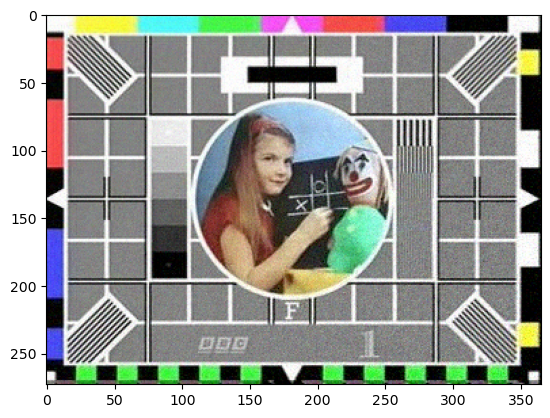

In [37]:
#plt.imshow(img)
plt.imshow(tf.reshape(model_output, shape=[273, 365, -1]))
plt.savefig(f"answer.png", bbox_inches='tight')